In [1]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.applications.VGG19 import preprocess_input
from keras.applications.Resnet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
base_model=Resnet(weights='imagenet',include_top=False)
base_model=VGG19(weights='imagenet',include_top=False)

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(3,activation='softmax')(x) #final layer with softmax activation

C:\Users\amishra3\AppData\Local\Continuum\anaconda3\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [3]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128       
__________

In [4]:
model=Model(inputs=base_model.input,outputs=preds)

In [5]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [6]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('./train/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 132 images belonging to 3 classes.


In [7]:
test_data = train_datagen.flow_from_directory('./test/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 132 images belonging to 3 classes.


In [8]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
hist = model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=5)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
4/4 [==============================] - 25s 6s/step - loss: 1.7525 - acc: 0.4609
Epoch 2/5
4/4 [==============================] - 21s 5s/step - loss: 0.4629 - acc: 0.8053
Epoch 3/5
4/4 [==============================] - 18s 4s/step - loss: 0.1188 - acc: 0.9315
Epoch 4/5
4/4 [==============================] - 19s 5s/step - loss: 0.6290 - acc: 0.8053
Epoch 5/5
4/4 [==============================] - 18s 4s/step - loss: 0.3645 - acc: 0.8845


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128       
__________

In [10]:
print(hist.history.keys())

dict_keys(['loss', 'acc'])


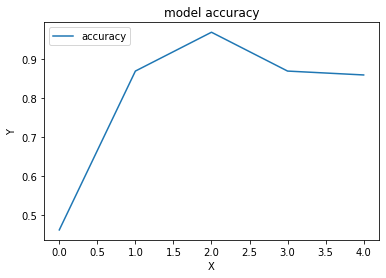

In [11]:
plt.plot(hist.history['acc'])
plt.title('model accuracy')
plt.ylabel('Y')
plt.xlabel('X')
plt.legend(['accuracy'], loc='upper left')
plt.show()

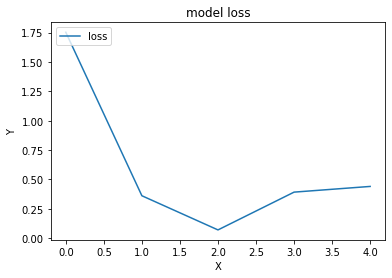

In [12]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('Y')
plt.xlabel('X')
plt.legend(['loss'], loc='upper left')
plt.show()

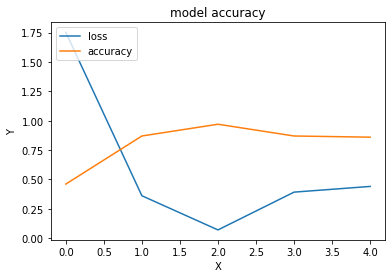

In [13]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['acc'])
plt.title('model accuracy')
plt.ylabel('Y')
plt.xlabel('X')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()